In [1]:
## normal imports and setup
%reset -f
%matplotlib notebook
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt

/home/user/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
## imports for jupyterthemes
from jupyterthemes import jtplot
jtplot.style()

/home/user/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
## imports for sklearn
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift

In [6]:

# load data
drivers_df = pd.read_csv('datasets/driver_details.csv')
drivers_df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [7]:
drivers_df.shape

(4000, 3)

In [8]:
drivers_df[drivers_df.isnull().any(axis=1)]

,Driver_ID,Distance_Feature,Speeding_Feature


In [9]:
drivers_df.describe()

,Driver_ID,Distance_Feature,Speeding_Feature
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [10]:
drivers_features = drivers_df.drop('Driver_ID',axis=1)
drivers_features.columns

Index(['Distance_Feature', 'Speeding_Feature'], dtype='object')

In [13]:
parameters = {'n_clusters':[2,3,4,5,10,20,30]}
parameter_grid = ParameterGrid(parameters)
list(parameter_grid)

[{'n_clusters': 2},
 {'n_clusters': 3},
 {'n_clusters': 4},
 {'n_clusters': 5},
 {'n_clusters': 10},
 {'n_clusters': 20},
 {'n_clusters': 30}]

In [15]:
best_score = -1
model = KMeans()

In [19]:
for g in parameter_grid:
    model.set_params(**g)
    model.fit(drivers_features)
    ss = metrics.silhouette_score(drivers_features, model.labels_)
    print('Parameter: ',g,'Score: ',ss)
    if ss > best_score:
        best_score = ss
        best_grid = g

Parameter:  {'n_clusters': 2} Score:  0.8490223286225532
Parameter:  {'n_clusters': 3} Score:  0.8231396834167266
Parameter:  {'n_clusters': 4} Score:  0.5911323766293183
Parameter:  {'n_clusters': 5} Score:  0.5128161654454148
Parameter:  {'n_clusters': 10} Score:  0.43616364819942693
Parameter:  {'n_clusters': 20} Score:  0.36946603965592273
Parameter:  {'n_clusters': 30} Score:  0.35116378509397894


<IPython.core.display.Javascript object>


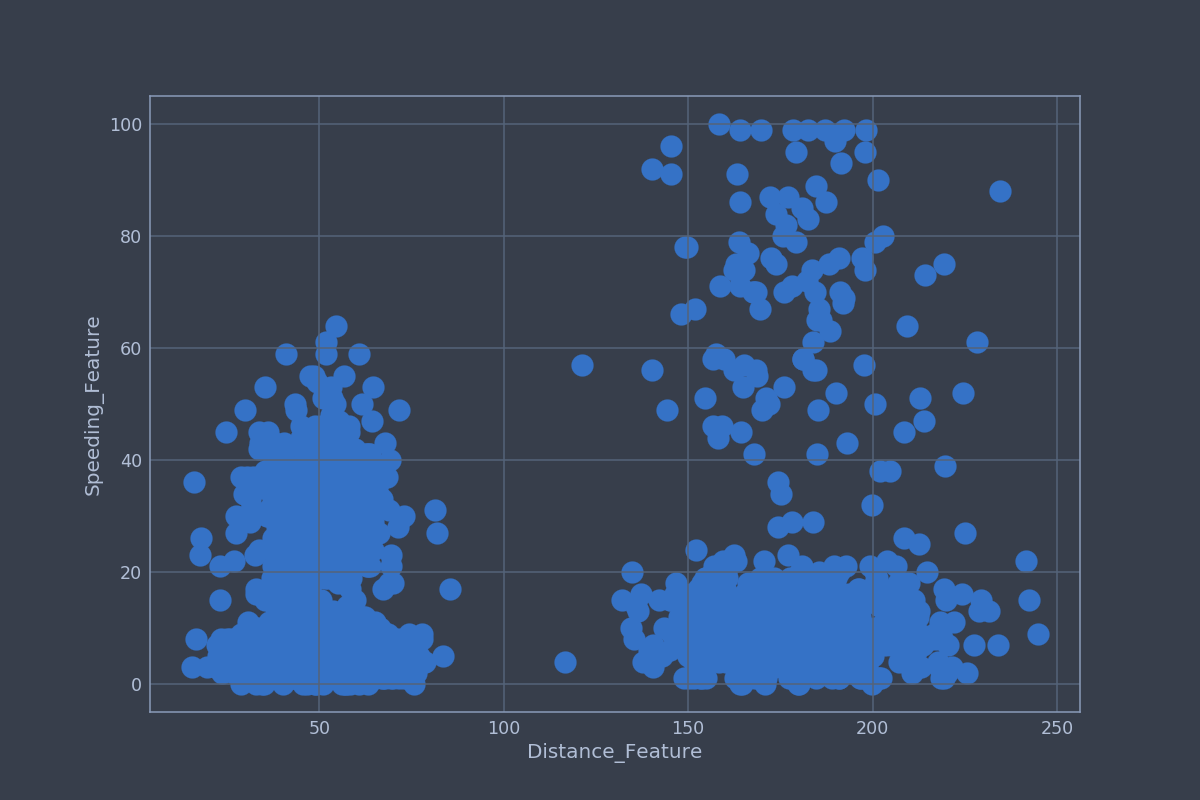

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(drivers_features['Distance_Feature'],
           drivers_features['Speeding_Feature'], s= 250)
plt.xlabel('Distance_Feature')
plt.ylabel('Speeding_Feature')
plt.show()

In [21]:
parameters = {'eps':[.9,1,5,10,12,14,20],
             'min_samples':[5,7,10,12]}
parameter_grid = ParameterGrid(parameters)
list(parameter_grid)

[{'eps': 0.9, 'min_samples': 5},
 {'eps': 0.9, 'min_samples': 7},
 {'eps': 0.9, 'min_samples': 10},
 {'eps': 0.9, 'min_samples': 12},
 {'eps': 1, 'min_samples': 5},
 {'eps': 1, 'min_samples': 7},
 {'eps': 1, 'min_samples': 10},
 {'eps': 1, 'min_samples': 12},
 {'eps': 5, 'min_samples': 5},
 {'eps': 5, 'min_samples': 7},
 {'eps': 5, 'min_samples': 10},
 {'eps': 5, 'min_samples': 12},
 {'eps': 10, 'min_samples': 5},
 {'eps': 10, 'min_samples': 7},
 {'eps': 10, 'min_samples': 10},
 {'eps': 10, 'min_samples': 12},
 {'eps': 12, 'min_samples': 5},
 {'eps': 12, 'min_samples': 7},
 {'eps': 12, 'min_samples': 10},
 {'eps': 12, 'min_samples': 12},
 {'eps': 14, 'min_samples': 5},
 {'eps': 14, 'min_samples': 7},
 {'eps': 14, 'min_samples': 10},
 {'eps': 14, 'min_samples': 12},
 {'eps': 20, 'min_samples': 5},
 {'eps': 20, 'min_samples': 7},
 {'eps': 20, 'min_samples': 10},
 {'eps': 20, 'min_samples': 12}]

In [33]:
model = DBSCAN()
best_score = -1
for g in parameter_grid:
    model.set_params(**g)
    model.fit(drivers_features)
    ss = metrics.silhouette_score(drivers_features, model.labels_)
    print('Parameter: ',g,'Score: ',ss)
    if ss > best_score:
        best_score = ss
        best_grid = g

Parameter:  {'eps': 0.9, 'min_samples': 5} Score:  -0.6057173612292268
Parameter:  {'eps': 0.9, 'min_samples': 7} Score:  -0.4265046999507063
Parameter:  {'eps': 0.9, 'min_samples': 10} Score:  -0.39254168253371013
Parameter:  {'eps': 0.9, 'min_samples': 12} Score:  -0.4286838741223884
Parameter:  {'eps': 1, 'min_samples': 5} Score:  -0.6155746493060738
Parameter:  {'eps': 1, 'min_samples': 7} Score:  -0.41637001640330673
Parameter:  {'eps': 1, 'min_samples': 10} Score:  -0.3837814631696031
Parameter:  {'eps': 1, 'min_samples': 12} Score:  -0.38648235283744914
Parameter:  {'eps': 5, 'min_samples': 5} Score:  0.31011275260225
Parameter:  {'eps': 5, 'min_samples': 7} Score:  0.7820011223700856
Parameter:  {'eps': 5, 'min_samples': 10} Score:  0.7974222681120255
Parameter:  {'eps': 5, 'min_samples': 12} Score:  0.7914367881923341
Parameter:  {'eps': 10, 'min_samples': 5} Score:  0.7598056658175875
Parameter:  {'eps': 10, 'min_samples': 7} Score:  0.8157570071704705
Parameter:  {'eps': 10,

In [34]:
best_grid

{'eps': 20, 'min_samples': 5}

In [35]:
model.set_params(**best_grid)
model.fit(drivers_features)

DBSCAN(algorithm='auto', eps=20, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [36]:
len(model.labels_)

4000

In [37]:
n_clusters = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
n_clusters

2

In [38]:
n_noise = list(model.labels_).count(-1)
n_noise

0

In [39]:
another_grid = {'eps':5.0, 'min_samples':5}
model.set_params(**another_grid)
model.fit(drivers_features)
n_clusters = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
print('number of cluseters: ', n_clusters)
n_noise = list(model.labels_).count(-1)
print('noisy points: ',n_noise)

number of cluseters:  7
noisy points:  117


In [40]:
another_grid = {'eps':5.0, 'min_samples':7}
model.set_params(**another_grid)
model.fit(drivers_features)
n_clusters = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
print('number of cluseters: ', n_clusters)
n_noise = list(model.labels_).count(-1)
print('noisy points: ',n_noise)

number of cluseters:  3
noisy points:  157


In [41]:
from sklearn.cluster import estimate_bandwidth
estimate_bandwidth(drivers_features)

33.960524729584314

In [42]:
model = MeanShift(bandwidth=estimate_bandwidth(drivers_features)).fit(drivers_features)
metrics.silhouette_score(drivers_features,model.labels_)

0.8231396834167266